# Classificador de Carros usando Tensorflow 

Neste notebook iremos implementadar um modelo para classificação de imagens. Classificação é uma das "tarefas" em que podemos utilizar Machine Learning, nesta tarefa o ensino é **supervisionado**, em outras palavras nós vamos ensinar ao modelo através de exemplos com gabarito.

Nosso modelo deverá receber imagens de veículos e não-veículos e identificar a que **classe** (veículo ou não-veículo) estas imagens pertencem.

## Dados

Os dados foram retirados da base de dados da Udacity ([Veículos](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip) e [Não-veículos](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip)) que contém aproximadamente 9000 imagens de cada classe.

## Modelo

Iremos utilizar uma CNN com __[CONV -> CONV -> POOL -> DROP -> FULLY_CONV -> DROP -> FULLY_CONV]__. As camadas FULLY_CONV são camadas convolucionais que funcionam como camadas Densas. Nós utilizamos camadas FULLY_CONV quando não queremos restringir o tamanho da entrada para as camadas densas. No [artigo original](https://medium.com/@tuennermann/convolutional-neural-networks-to-find-cars-43cbc4fb713), o autor utiliza-se deve artefato para adaptar uma rede treinada inicialmente para classificação como uma rede para detecção.

## Créditos

Essa atividade é baseada no artigo do Medium encontrado [aqui](https://medium.com/@tuennermann/convolutional-neural-networks-to-find-cars-43cbc4fb713) implementada originalmente por [@tuennermann](https://medium.com/@tuennermann/convolutional-neural-networks-to-find-cars-43cbc4fb713).

Obrigada a todos os envolvidos!

## Dependências

In [1]:
# Compatibilidade entre Python 2 e Python 3
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# TensorFlow
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)  # Permitindo visualização de logs

# Bibliotecas auxiliares
import cv2  # maior eficiência ao processar as imagens

import numpy as np  # manipular vetores
from glob import glob # carregar arquivos
import matplotlib.pyplot as plt  # plotar imagens
from sklearn.model_selection import train_test_split # dividir o banco em treinamento e teste
%matplotlib inline

# IMPORTANTE: essa linha garante que os números gerados aleatoriamente são previsíveis
np.random.seed(0)

print ('Sua versão do TensorFlow:', tf.__version__)
print ('Recomenda-se para esta atividade uma versão >= 1.4.0')

Sua versão do TensorFlow: 1.4.0
Recomenda-se para esta atividade uma versão >= 1.4.0


## Buscando os Dados

### Baixa e extraia os dados

Para baixar os dados, cri uma pasta data na pasta em que se encontra este notebook e execute os seguintes comandos dentro da pasta recém-criada.

```bash
curl -O https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
curl -O https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip
unzip vehicles.zip
unzip non-vehicles.zip
```

Ou você pode baixar os dados manualmente clicando [neste link](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip) e [neste link](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip) e extraí-los nesta pasta.

Após extrair as pastas você deverá ver as seguintes subpastas:

```bash
data/
data/vehicles
data/non-vehicles
```

Crie também uma pasta _models_ na mesma pasta desse notebook.

## Visualizando os dados

In [2]:
def print_info(x, y):
    unique, counts = np.unique(y, return_counts=True)
    print('x: {} {} \t y: {} {} \t counts: {}'.format(x.shape, x.dtype, y.shape, y.dtype, dict(zip(unique, counts))))

def get_samples(x, y, class_label, n_samples=10):
    mask = np.where(y == class_label)[0][:n_samples]
    return x[mask], y[mask]

def plot_batch(img_batch, y_true, y_pred=None, n_cols=10):
    plt.figure(figsize=(16,5))
    
    y_pred = y_true if y_pred is None else y_pred    
    n_rows = img_batch.shape[0] // n_cols + 1
    for img, true, pred, sub in zip(img_batch, y_true, y_pred, range(1, len(img_batch)+1)):
        plt.subplot(n_rows, n_cols, sub)
        plt.imshow(img.astype(np.uint8))
        
        title = "{}:{:.2f}".format("car" if pred > 0 else "non-car", pred)
        pred = np.where(pred > 0, 1, -1)
        c = 'green' if true == pred else 'red'
        
        plt.title(title, color = c)
        plt.axis('off')
    plt.tight_layout()

In [3]:
cars = glob('data/vehicles/*/*.png')
non_cars = glob('data/non-vehicles/*/*.png')

y = np.concatenate([np.ones(len(cars)), np.zeros(len(non_cars))-1])

x = []
for file in cars:
    x.append(cv2.imread(file))
    
for file in non_cars:
    x.append(cv2.imread(file))
    
x = np.array(x)

print_info(x, y)

x: (17760, 64, 64, 3) uint8 	 y: (17760,) float64 	 counts: {-1.0: 8968, 1.0: 8792}


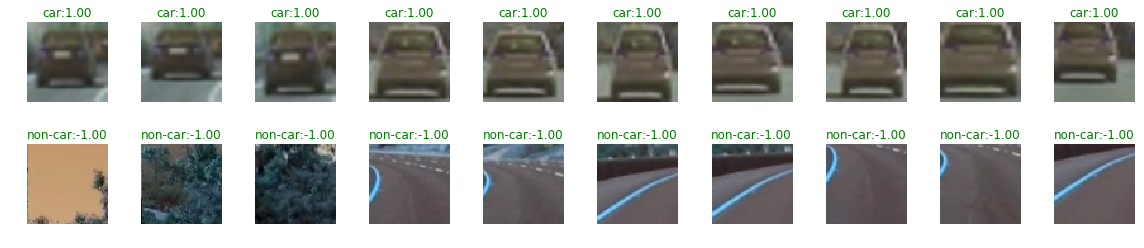

In [4]:
car_samples, car_labels = get_samples(x, y, class_label=1)
noncar_samples, noncar_labels = get_samples(x, y, class_label=-1)

samples = np.vstack((car_samples, noncar_samples))
labels = np.concatenate((car_labels, noncar_labels))
plot_batch(samples, labels)

In [5]:
# Split the dataset into training, validation, and testing
x_train, x_test, y_train, y_test = train_test_split(x.astype(np.float32), y.astype(np.float32), test_size=0.1, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=x_test.shape[0], stratify=y_train, random_state=42)

print_info(x_train, y_train)
print_info(x_val, y_val)
print_info(x_test, y_test)

x: (14208, 64, 64, 3) float32 	 y: (14208,) float32 	 counts: {-1.0: 7174, 1.0: 7034}
x: (1776, 64, 64, 3) float32 	 y: (1776,) float32 	 counts: {-1.0: 897, 1.0: 879}
x: (1776, 64, 64, 3) float32 	 y: (1776,) float32 	 counts: {-1.0: 897, 1.0: 879}


## Implementando o modelo

### Hiper-parâmetros 

In [6]:
BATCH_SIZE = 128
TRAIN_EPOCHS = 2

### Modelo 

In [7]:
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_dataset = tf.placeholder(dtype=tf.float32, shape=[None, 64, 64, 3], name='tf_dataset')
    tf_labels = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='tf_labels')
    tf_dropout = tf.placeholder(dtype=tf.bool, name='tf_dropout')
    
    conv1 = tf.layers.conv2d(inputs=tf_dataset, 
                             filters=10, 
                             kernel_size=[3,3], 
                             activation=tf.nn.relu, 
                             kernel_initializer=tf.contrib.layers.xavier_initializer(),
                             padding='same', 
                             name='conv1')
    conv2 = tf.layers.conv2d(inputs=conv1, 
                             filters=10, 
                             kernel_size=[3,3], 
                             activation=tf.nn.relu, 
                             kernel_initializer=tf.contrib.layers.xavier_initializer(),
                             padding='same', 
                             name='conv2')
    pool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[8,8], strides=[8,8])
    drop1 = tf.layers.dropout(inputs=pool1, rate=0.25, training=tf_dropout)

    dens1 = tf.layers.conv2d(inputs=drop1, 
                             filters=128, 
                             kernel_size=[8,8], 
                             activation=tf.nn.relu, 
                             kernel_initializer=tf.contrib.layers.xavier_initializer(),
                             padding='valid', 
                             name='dense1')
    drop2 = tf.layers.dropout(inputs=dens1, rate=0.5, training=tf_dropout)
    output = tf.layers.conv2d(inputs=drop2, 
                              filters=1, 
                              kernel_size=[1,1], 
                              activation=tf.nn.tanh,
                              kernel_initializer=tf.contrib.layers.xavier_initializer(),
                              padding='valid', 
                              name='dense2')


    loss = tf.reduce_mean(tf.squared_difference(tf.squeeze(tf_labels), tf.squeeze(output)))    
    optimizer = tf.train.AdadeltaOptimizer(learning_rate=1.0, rho=0.95, epsilon=1e-08).minimize(loss)

    output = tf.squeeze(output)
    tf_pred = tf.where(output > 0, tf.ones_like(output), -1*tf.ones_like(output))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(tf_labels), tf_pred), tf.float32))*100

## Treinando o Modelo

In [8]:
steps_by_epoch = x_train.shape[0] // BATCH_SIZE
n_steps = TRAIN_EPOCHS * steps_by_epoch

with tf.Session(graph=graph) as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_steps+1):
        offset = (step*BATCH_SIZE) % (x_train.shape[0] - BATCH_SIZE)
        
        x_batch = x_train[offset:(offset+BATCH_SIZE)]
        y_batch = y_train[offset:(offset+BATCH_SIZE)].reshape(-1,1)
        
        x_batch = (x_batch/127.5)-1.0
        
        feed_dict = {tf_dataset:x_batch, tf_labels:y_batch, tf_dropout:True}        
        _, loss_batch, accuracy_batch = sess.run([optimizer, loss, accuracy], feed_dict=feed_dict)
        
        print('\rstep: {:=3}/{:=3} batch_loss: {:.5f} batch_accuracy: {:.2f}%'.format(step%steps_by_epoch, steps_by_epoch, loss_batch, accuracy_batch), end='')
        if step % steps_by_epoch == 0:
            feed_dict = {tf_dataset:(x_val/127.5)-1.0, tf_labels:y_val.reshape(-1,1), tf_dropout:False} 
            loss_val, accuracy_val = sess.run([loss, accuracy], feed_dict=feed_dict)
            print('\repoch: {0:=2} batch_loss: {1:.5f} batch_accuracy: {2:.2f}% val_loss: {3:.5f} val_accuracy: {4:.2f}%'.format(step//steps_by_epoch, loss_batch, accuracy_batch, loss_val, accuracy_val))
    
    feed_dict = {tf_dataset:(x_test/127.5)-1.0, tf_labels:y_test.reshape(-1,1), tf_dropout:False}
    [accuracy_test] = sess.run([accuracy], feed_dict=feed_dict)
    print('Test Accuracy: {:.2f}%'.format(accuracy_test))
    
    saver.save(sess, 'models/cnn_cars')

epoch:  0 batch_loss: 0.99191 batch_accuracy: 47.66% val_loss: 0.93907 val_accuracy: 49.49%
epoch:  1 batch_loss: 0.18407 batch_accuracy: 95.31% val_loss: 0.19217 val_accuracy: 93.64%
epoch:  2 batch_loss: 0.08522 batch_accuracy: 97.66% val_loss: 0.10298 val_accuracy: 96.79%
Test Accuracy: 97.30%


Mesmo com poucas epochs, conseguimos uma __acurácia > 95%__ no banco de teste!

## Restaurando o modelo e Testando 

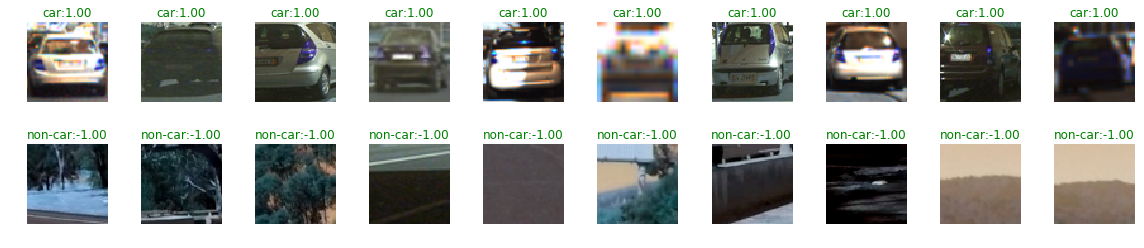

In [9]:
car_test, car_labels = get_samples(x_test, y_test, class_label=1)
noncar_test, noncar_labels = get_samples(x_test, y_test, class_label=-1)

test_batch = np.vstack((car_test, noncar_test))
test_labels = np.concatenate((car_labels, noncar_labels))

plot_batch(test_batch, test_labels, test_labels)

In [10]:
# rode o comando abaixo se você quiser ver o nome de todos os nós do nosso grafo
#[n.name for n in tf.get_default_graph().as_graph_def().node]

INFO:tensorflow:Restoring parameters from models/cnn_cars


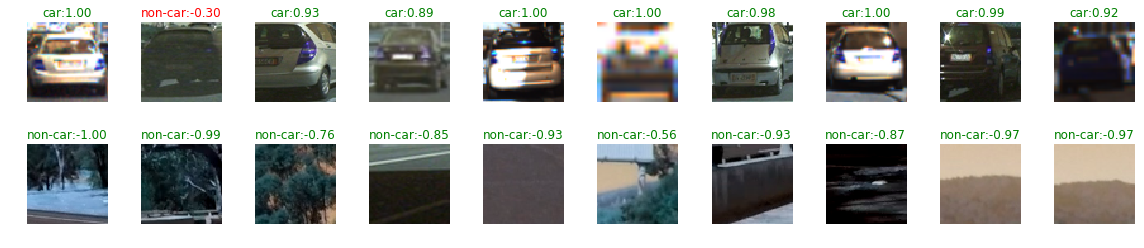

In [11]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('{}{}.meta'.format('models/', 'cnn_cars'))
    new_saver.restore(sess, tf.train.latest_checkpoint('models/'))
    
    graph = tf.get_default_graph()
    tf_dataset = graph.get_tensor_by_name("tf_dataset:0")
    tf_labels = graph.get_tensor_by_name("tf_labels:0")
    tf_dropout = graph.get_tensor_by_name("tf_dropout:0")
    tf_dense2 = graph.get_tensor_by_name("dense2/Tanh:0")
    
    feed_dict = {tf_dataset:(test_batch/127.5)-1.0, tf_labels:test_labels.reshape(-1,1), tf_dropout:False}
    [output] = sess.run([tf_dense2], feed_dict=feed_dict)
    
    plot_batch(test_batch, test_labels, np.squeeze(output))

Os títulos de cada imagem representam:
- __classe predita__: {car, non-car}
- __score de confiança__: [-1, 1], onde -1 = certeza de não ser carro e 1 = certeza de ser carro. Quando o score é próximo de 0, a rede não tem certeza se a imagem é carro ou não-carro.

Os títulos em vermelho representam as imagem __incorretamente__ classificadas pela nossa rede.

## Referências

- [Artigo Original](https://medium.com/@tuennermann/convolutional-neural-networks-to-find-cars-43cbc4fb713)
- [Código Original (in Keras)](https://github.com/HTuennermann/Vehicle-Detection-and-Tracking)
- [Vehicle Dataset](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip) and [Non-Vehicle Dataset](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip)
- [A quick complete tutorial to save and restore Tensorflow models](http://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/)